# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [21]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline

In [22]:
# Read the Mapbox API key
map_box_api = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [23]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")

sfo_data = pd.read_csv(file_path, index_col="year")

sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [24]:
# Calculate the mean number of housing units per year (hint: use groupby) 
grouped_df = sfo_data['housing_units']

units_by_year_df = grouped_df.groupby(by = 'year').mean()

units_by_year_df

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

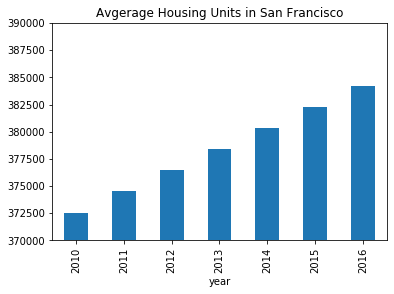

In [25]:
# Use the Pandas plot function to plot the average housing units per year.
ax = units_by_year_df.plot(kind='bar', title = 'Avgerage Housing Units in San Francisco')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
ax.set_ylim(370000,390000)
ax.set_xlabel = 'Year'
ax.set_ylabel = 'Avg. Housing Units'

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [26]:
# Calculate the average gross rent and average sale price per square foot
grouped_df_2 = sfo_data[['sale_price_sqr_foot','gross_rent']]

sales_rent_df = grouped_df_2.groupby(by = 'year').mean()

sales_rent_df

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

Text(0, 0.5, 'Gross Rent')

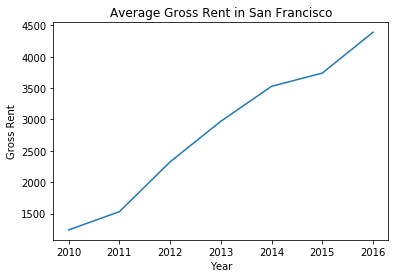

In [27]:
# Plot the Average Gross Rent per Year as a Line Chart 
ax1 = sales_rent_df['gross_rent'].plot(title = 'Average Gross Rent in San Francisco')

# Adding axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Gross Rent')

### Average Sales Price per Year

Text(0, 0.5, 'Avg. Sale Price')

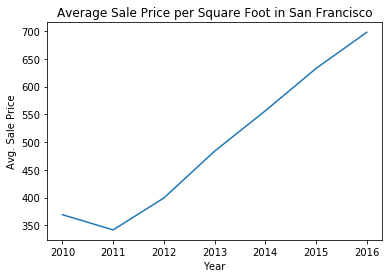

In [28]:
# Plot the Average Sales Price per Year as a line chart
ax2 = sales_rent_df['sale_price_sqr_foot'].plot(title = 'Average Sale Price per Square Foot in San Francisco')

# Adding axis labels
ax2.set_xlabel('Year')
ax2.set_ylabel('Avg. Sale Price')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [29]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sales_prices = sfo_data.groupby(by = ['year','neighborhood']).mean()

sales_prices.drop(['housing_units','gross_rent'], axis = 1, inplace = True)

sales_prices

sale_price_sqr_foot
year neighborhood                               
2010 Alamo Square                     291.182945
     Anza Vista                       267.932583
     Bayview                          170.098665
     Buena Vista Park                 347.394919
     Central Richmond                 319.027623
...                                          ...
2016 Telegraph Hill                   903.049771
     Twin Peaks                       970.085470
     Van Ness/ Civic Center           552.602567
     Visitacion Valley                328.319007
     Westwood Park                    631.195426

[397 rows x 1 columns]

In [30]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sales_prices.hvplot(x = 'year', y = 'sale_price_sqr_foot', groupby = 'neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [31]:
# Getting the data from the top 10 expensive neighborhoods
hood_mean_df = sfo_data.groupby(by = 'neighborhood').mean()

sorted_hood_df = hood_mean_df.sort_values(by = 'sale_price_sqr_foot', ascending = False)

high_price_df = sorted_hood_df[0:9]

high_price_df

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714

(600, 950)

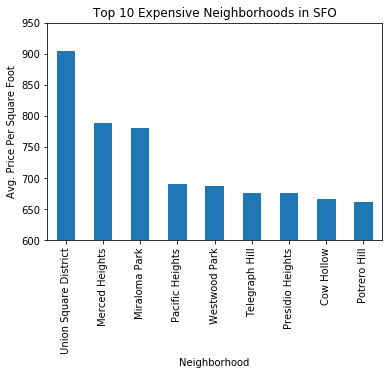

In [32]:
# Plotting the data from the top 10 expensive neighborhoods
ax3 = high_price_df['sale_price_sqr_foot'].plot(kind='bar', title = 'Top 10 Expensive Neighborhoods in SFO')

ax3.set_xlabel('Neighborhood')
ax3.set_ylabel('Avg. Price Per Square Foot')
ax3.set_ylim(600,950)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [33]:
# Parallel Coordinates Plot
px.parallel_coordinates(high_price_df, color = 'sale_price_sqr_foot')

In [34]:
# Parallel Categories Plot

high_price_df_reset = high_price_df.reset_index()

px.parallel_categories(high_price_df_reset, color = 'sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [35]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [36]:
# Calculate the mean values for each neighborhood

sorted_hood_df.reset_index(inplace=True)

sorted_hood_df.sort_values(by = 'neighborhood', ascending = True, inplace=True)

sorted_hood_df.reset_index(inplace=True)

sorted_hood_df.drop(['index'], axis=1, inplace=True)

sorted_hood_df

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0         Alamo Square           366.020712      378401.00  2817.285714
1           Anza Vista           373.382198      379050.00  3031.833333
2              Bayview           204.588623      376454.00  2318.400000
3      Bayview Heights           590.792839      382295.00  3739.000000
4      Bernal Heights            576.746488      379374.50  3080.333333
..                 ...                  ...            ...          ...
68         West Portal           498.488485      376940.75  2515.500000
69    Western Addition           307.562201      377427.50  2555.166667
70  Westwood Highlands           533.703935      376454.00  2250.500000
71       Westwood Park           687.087575      382295.00  3959.000000
72         Yerba Buena           576.709848      377427.50  2555.166667

[73 rows x 4 columns]

In [37]:
# Join the average values with the neighborhood locations
concat_df = pd.concat([df_neighborhood_locations,sorted_hood_df], axis = 'columns', join = 'outer')

concat_df.drop(['neighborhood'], axis=1, inplace = True)

concat_df

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0         Alamo Square  37.791012 -122.402100           366.020712   
1           Anza Vista  37.779598 -122.443451           373.382198   
2              Bayview  37.734670 -122.401060           204.588623   
3      Bayview Heights  37.728740 -122.410980           590.792839   
4       Bernal Heights  37.728630 -122.443050           576.746488   
..                 ...        ...         ...                  ...   
68         West Portal  37.740260 -122.463880           498.488485   
69    Western Addition  37.792980 -122.435790           307.562201   
70  Westwood Highlands  37.734700 -122.456854           533.703935   
71       Westwood Park  37.734150 -122.457000           687.087575   
72         Yerba Buena  37.792980 -122.396360           576.709848   

    housing_units   gross_rent  
0       378401.00  2817.285714  
1       379050.00  3031.833333  
2       376454.00  2318.400000  
3       382295.00  3739.000000  
4       379374.50  3080.333333  
..            ...          ...  
68      376940.75  2515.500000  
69      377427.50  2555.166667  
70      376454.00  2250.500000  
71      382295.00  3959.000000  
72      377427.50  2555.166667  

[73 rows x 6 columns]

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [38]:
# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(concat_df, lat="Lat", lon="Lon", color="gross_rent", size='sale_price_sqr_foot')